Experimento muy simple solo para ilustrar el funcionamiento del QuantileTransformer cuando se tiene un target de distribución gaussiana.

sklearn.preprocessing.QuantileTransformer:
1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer.inverse_transform
1. https://en.wikipedia.org/wiki/Quantile_normalization
1. https://stats.stackexchange.com/questions/325570/quantile-transformation-with-gaussian-distribution-sklearn-implementation

In [1]:
import sys
sys.path.append('../')

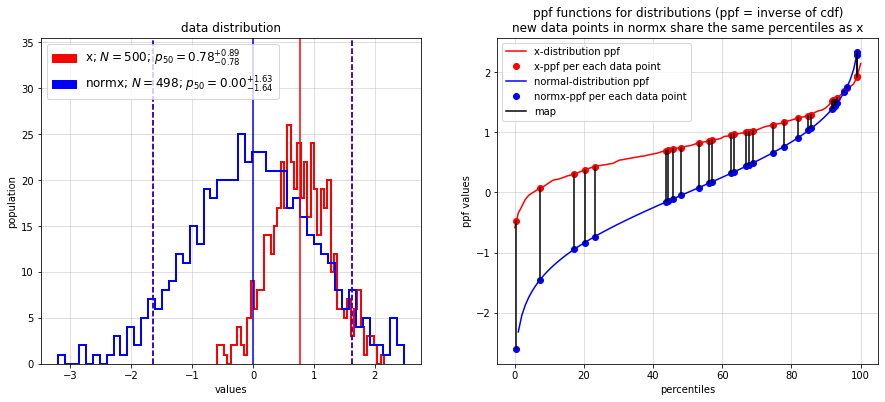

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mismatch.plots import plot_hist_bins
from mismatch.quantile_transform import naive_quantile_normal

'''
cdf = cumulative density function
ppf = Percent point function (inverse of cdf — percentiles).
'''

fig, axs = plt.subplots(1, 2, figsize=(15,6))
n = 500
to_plot_points = 30
hist_kwargs = {
    'fig':fig,
    'ax':axs[0],
    'bins':50,
    'cmap':matplotlib.colors.ListedColormap(['r','b'], name=''),
    'title':'data distribution',
    'legend_loc':'upper left',
}

n_quantiles = 100 # or percentiles
x = np.random.RandomState(0).normal(loc=0.8, scale=0.5, size=(n,1)) # generate random data
normx, to_plot = naive_quantile_normal(x, n_quantiles) # get nromalized data
x_percentiles, x_distr_ppf, x_percentiles_i, normx_percentiles_i, norm_ppf = to_plot

### plots
to_plot = {'x':x, 'normx':normx[~(np.abs(normx)==np.infty)]} # for this example, we don't care for infty values
plot_hist_bins(to_plot, **hist_kwargs)

ax = axs[1]
ax.plot(x_percentiles, x_distr_ppf, '-r', label='x-distribution ppf')
ax.plot(x_percentiles_i[:30], x[:30], 'or', label='x-ppf per each data point')
ax.plot(x_percentiles, norm_ppf, 'b-', label='normal-distribution ppf')
ax.plot(normx_percentiles_i[:30], normx[:30], 'ob', label='normx-ppf per each data point')
for i in range(0,30):
    ax.plot([x_percentiles_i[i], normx_percentiles_i[i]], [x[i], normx[i]], 'k', label='map' if i==0 else None)
ax.grid(alpha=0.5)
ax.set_title('ppf functions for distributions (ppf = inverse of cdf)\nnew data points in normx share the same percentiles as x')
ax.set_xlabel('percentiles')
ax.set_ylabel('ppf values')
ax.legend()